<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 1

### Problem 0 (3 points)

## Part 1: Sets and Functions 

### Problem 1.1 (Exam Style)

$$
\begin{array}{|c|c|c|c|c|c|c|c|}
	\hline
	\mbox{Domain} & \mbox{Codomain} & \mbox{Map} & \mbox{Function?} & \mbox{Injection?} & \mbox{Surjection?} & \mbox{Bijection?}
	& \mbox{None of these} \\\hline
	\{1, 2\} & \{a, b\} & \{(1, a), (1, b)\} & & & & & yes \\\hline
	\{1, 2\} & \{a, b\} & \{(1, a), (2, a)\} & yes & & & & \\\hline
	\{1, 2\} & \{a, b\} & \{(1, b), (2, a)\} & yes & yes & yes & yes & \\\hline
	\{1, 2\} & \{a, b, c\} & \{(2, a), (1, c)\} & yes & yes & & & \\\hline
	\{1, 2\} & \{b\} & \{(1, b), (2, b)\} & yes & & yes & & \\\hline
\end{array}
$$

### Problem 1.2 (Exam Style)

$n(a,b) = 2^{ab}$ 

The set of all possible maps from $A$ to $B$ is equivalent to the power set of all possible distinct $(x,y)$ in $A \times B$, excluding the empty set which is included in the power set, but is not considered a map. The number of subsets in a power set for an original set with $n$ items is $2^{n}$. The size of the original set in this case is the number of unique $(x,y)$ in $A \times B$ which is the number of items in $A$ multiplied by the number of items in $B$. This makes the size of the original set $a \times b$. So, the number of items in this power set would be $2^{ab}$. Subtracting 1 from this number to exclude the empty set gives the number of all possible maps from $A$ to $B$.

Examples:

$n(3,3)= 2^{3 \times 3} - 1 = 2^{9} - 1 511$ 

$n(2,4)= 2^{2 \times 4} - 1 = 2^{8} - 1 = 255$ 

$n(5,3)= 2^{5 \times 3} - 1 = 2^{15} - 1 = 32767$ 

### Problem 1.3 (Exam Style)

$n(a,b)= b^{a}$

In order to be a function, each value in the Domain, $A$ must point to a single value in the codomain $B$. Different $x \in A$ can however point to the same $y \in B$. This means that for each $x$ there are $b$ possible choices for $y$ and since we must choose 1 $y$ for each $x$ we have the option to choose $b$ choices $a$ times. Since repetition is allowed for these functions this would be calculated using a permutation where (# of choices)^{#times the choice is made} which is equal to $a^{b}$.

Examples:

$n(3,3)= 3^{3} = 27$

$n(2,4)= 4^{2} = 16$

$n(5,3)= 3^{5} = 243$

### Problem 1.4 (Exam Style)

if $a=b$: $n(a,b) = a!$ $\\$
if $a \neq b$: $n(a,b) = 0$   

Since bijective pairs require each $x$ to be paired with exactly one $y$ and each $y$ to be paired with exactly one $x$, the number of $x \in A$ must be the same as the number of $y \in B$, so $a$ must equal $b$ in order for there to a bijection from $A$ to $B$. Similar to Problem 1.3, we must choose one $y$ for each value of $x$, however, this time, repetition is not allowed, so for $x_{1}$ there are $b$ choices but then for $x_{2}$ there are $b-1$ choices. Since $b=a$, the number of choices works out to be $a!$ which is also equal to $b!$.

Examples:

$n(4,4) = 4! = 24$

$n(2,4)= 0$

$n(5,3)= 0$

### Problem 1.5 (Exam Style)

Out of $M$ possible messages, $N$ are chosen without replacement since a the same message, $x_{n}$, would not be chosen twice and potential have 2 different $y_{n}$. This means the number of different ways $N$ messages could be chosen from $M$ possible messages is:

$$
\left(\!
    \begin{array}{c}
      M \\
      N
    \end{array}
  \!\right) = \frac{M!}{N!(M-N)!}
$$

Then, for each message chosen in $N$, there are 2 possible options for the $y_{n}$ for each $x_{n}$. So, there are $2^{N}$ possible combinations for the $y_{n}$ in $N$.

The total number of possible training sets is the number of different ways $N$ messages can be chosen from the $M$ available multiplied by the number of possible combinations for all of the $y_{n}$ in $N$. 

Overall formula:

$$
\left(\!
    \begin{array}{c}
      M \\
      N
    \end{array}
  \!\right) 2^{N} = \frac{M!}{N!(M-N)!} (2^{N})
$$

Example:

$$
\left(\!
    \begin{array}{c}
      8 \\
      5
    \end{array}
  \!\right) 2^{5} = \frac{8!}{5!(8-5)!}(2^{5}) = 3584
$$

For $M=8$ and $N=5$, there are 3584 possible training sets.

## Part 2: Fitting Banded Linear Transformations 

### Problem 2.1

In [1]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall21', course='371d', homework=1):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))


In [2]:
import pickle


def read_data(file_name):
    retrieve(file_name)
    with open(file_name, 'rb') as file:
        d = pickle.load(file)
    return d

In [3]:
data = {data_set: read_data('{}.pkl'.format(data_set))
        for data_set in ('training', 'test')}

Downloaded file training.pkl
Downloaded file test.pkl


In [4]:
x_tr, y_tr = data['training']['x'], data['training']['y']

In [5]:
import numpy as np


def solve_system(u, v):
    return np.linalg.lstsq(u, v, rcond=None)[0]

In [6]:
h = solve_system(x_tr, y_tr)

In [7]:
def residual(h, x, y):
    diff = np.dot(x, h) - y
    r = np.linalg.norm(diff) / np.sqrt(x.size)
    return r

In [8]:
def diagonal_indicator(d, bandwidth):
    ind = np.zeros((d, d))
    for k in range(-bandwidth, bandwidth + 1):
        length = d - np.abs(k)
        ones = np.ones(length)
        ind += np.diag(ones, k=k)
    return ind.astype(bool)

In [9]:
def un_flatten_solution(h_flat, d, bandwidth):
    indicator = diagonal_indicator(d, bandwidth)
    h = np.zeros(d * d)
    h[indicator.ravel()] = h_flat
    h = np.reshape(h, (d, d))
    return h

In [110]:
def flatten_system(x, y, bandwidth):
    y_flat = y.flatten()
    full_h = solve_system(x,y)
    d = len(full_h)
    A = np.kron(x, np.eye(d))
    indicator = diagonal_indicator(d, bandwidth)
    flat_ind = indicator.flatten()
    keep = []
    for h in range(len(flat_ind)):
        if flat_ind[h] == True:
            keep.append(h)
    return (A[:, keep],y_flat)

In [111]:
def fit_banded_matrix(x, y, bandwidth):
    flat = flatten_system(x, y, bandwidth)
    A_flat = flat[0]
    y_flat = flat[1]
    h_flat = solve_system(A_flat, y_flat)
    d = len(x[0])
    return un_flatten_solution(h_flat, d, bandwidth)

In [112]:
residuals = []
bandwidth = np.arange(0,11)

for b in bandwidth:
    H = fit_banded_matrix(x_tr, y_tr, b)
    residuals.append(residual(H, x_tr, y_tr))

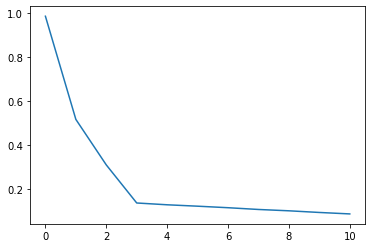

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.plot(bandwidth, residuals)

### Problem 2.2 (Exam Style)

When the matrix $h$ has a larger bandwidth, there are more values in the matrix which allows it to account better for the noise present in the distribution and better predict the true values which reduces the sum of the residuals. Having a larger bandwidth essentially increases the complexity of the model which always leads to a fit which more closely resembles the training data.

## Part 3: Learning Banded Linear Transformations 

### Problem 3.1

In [118]:
x_ts, y_ts = data['test']['x'], data['test']['y']

In [121]:
residuals = []
bandwidth = np.arange(0,11)

for b in bandwidth:
    H = fit_banded_matrix(x_tr, y_tr, b)
    tr_resid = residual(H, x_tr, y_tr)
    ts_resid = residual(H, x_ts, y_ts)
    residuals.append([tr_resid, ts_resid])

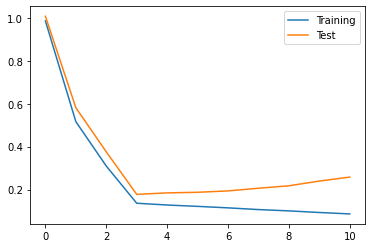

In [125]:
plt.plot(bandwidth, residuals)
plt.legend(["Training", "Test"])
plt.show()

### Problem 3.2 (Exam Style)

A bandwidth of 3 was most likely used to generate the data since this bandwidth has the lowest residuals on the test data. While the residuals on the training data were lower at higher band widths, this is to be expected since increasing the bandwidth (and the complexity of the fitted model) will always lower the residuals, but risks overfitting the data. So for this model, as bandwidth increases above 3, the test residuals start to rise again, suggesting that a bandwidth greater than 3 is an overfit for the training data, by more closely modeling the random distribution used to select the data in the training set rather than the actual overall distribution that's being fitted. 